In [24]:
import pandas as pd

In [25]:
#Load each social media following per team csv files
instagram_followers = pd.read_csv('../Resources/nfl_team_instagram_followers.csv')
facebook_followers = pd.read_csv('../Resources/nfl_team_facebook_followers.csv')
twitter_followers = pd.read_csv('../Resources/nfl_team_twitter_followers.csv')

In [26]:
print('Instragram Followers:')
print(instagram_followers.head())

Instragram Followers:
          Team Name   Instagram
0  Arizona  Caridnal    1200000
1    Atlanta Falcons    1400000
2   Baltimore Ravens    2200000
3      Buffalo Bills    1900000
4  Carolina Panthers    1900000


In [27]:
print('Facebook Followers:')
print(facebook_followers.head())

Facebook Followers:
          Team Name         Facebook
0  Arizona  Caridnal   1,300,000.00 
1    Atlanta Falcons   1,800,000.00 
2   Baltimore Ravens   2,200,000.00 
3      Buffalo Bills   1,000,000.00 
4  Carolina Panthers   2,100,000.00 


In [28]:
print('Twitter Followers:')
print(twitter_followers.head())

Twitter Followers:
          Team Name          Twitter  Unnamed: 2  Unnamed: 3  Unnamed: 4
0  Arizona  Caridnal   1,160,000.00          NaN         NaN         NaN
1    Atlanta Falcons   2,440,000.00          NaN         NaN         NaN
2   Baltimore Ravens   1,870,000.00          NaN         NaN         NaN
3      Buffalo Bills   1,710,000.00          NaN         NaN         NaN
4  Carolina Panthers   3,070,000.00          NaN         NaN         NaN


In [29]:
#Cleaning IG data
#Converting follower count to numeric
instagram_followers['Instagram'] = instagram_followers['Instagram'].apply(pd.to_numeric, errors='coerce')

In [30]:
#Cleaning FB Data
facebook_followers['Facebook'] = facebook_followers['Facebook'].str.replace(',', '').str.strip()
facebook_followers['Facebook'] = facebook_followers['Facebook'].apply(pd.to_numeric, errors='coerce')

In [31]:
#Cleaning Twitter Followers
#'Twitter' column to strings
twitter_followers['Twitter'] = twitter_followers['Twitter'].astype(str)

# Remove commas and strip extra spaces
twitter_followers['Twitter'] = twitter_followers['Twitter'].str.replace(',', '').str.strip()

# Convert counts to numeric
twitter_followers['Twitter'] = twitter_followers['Twitter'].apply(pd.to_numeric, errors='coerce')

# Drop unnecessary columns
twitter_followers_cleaned = twitter_followers.dropna(axis=1, how='all').copy()

# Rename the 'Twitter' column to 'X'
twitter_followers_cleaned.rename(columns={'Twitter': 'X'}, inplace=True)

# check the cleaned data
print(twitter_followers_cleaned.head())

          Team Name           X
0  Arizona  Caridnal  1160000.0
1    Atlanta Falcons  2440000.0
2   Baltimore Ravens  1870000.0
3      Buffalo Bills  1710000.0
4  Carolina Panthers  3070000.0


In [32]:
# I was running into an error when mergeing the columns 
# so i had to standardize the columns name

In [33]:
# Standardize the column names
instagram_followers.rename(columns=lambda x: x.strip(), inplace=True)
facebook_followers.rename(columns=lambda x: x.strip(), inplace=True)
twitter_followers_cleaned.rename(columns=lambda x: x.strip(), inplace=True)

In [34]:
# making sure all 'Team Name' columns are consistent
instagram_followers.rename(columns={'team name': 'Team Name'}, inplace=True)
facebook_followers.rename(columns={'team name': 'Team Name'}, inplace=True)
twitter_followers_cleaned.rename(columns={'team name': 'Team Name'}, inplace=True)


In [35]:
print(instagram_followers.columns)
print(facebook_followers.columns)
print(twitter_followers_cleaned.columns)

Index(['Team Name', 'Instagram'], dtype='object')
Index(['Team Name', 'Facebook'], dtype='object')
Index(['Team Name', 'X'], dtype='object')


In [36]:
merged_data = pd.merge(instagram_followers, facebook_followers, on='Team Name', how='outer')
merged_data = pd.merge(merged_data, twitter_followers_cleaned, on='Team Name', how='outer')

In [37]:
print(merged_data.head())


           Team Name  Instagram   Facebook          X
0  Arizona  Caridnal    1200000  1300000.0  1160000.0
1    Atlanta Falcons    1400000  1800000.0  2440000.0
2   Baltimore Ravens    2200000  2200000.0  1870000.0
3      Buffalo Bills    1900000  1000000.0  1710000.0
4  Carolina Panthers    1900000  2100000.0  3070000.0


In [38]:
merged_data.head()


,Team Name,Instagram,Facebook,X
0,Arizona Caridnal,1200000,1300000.0,1160000.0
1,Atlanta Falcons,1400000,1800000.0,2440000.0
2,Baltimore Ravens,2200000,2200000.0,1870000.0
3,Buffalo Bills,1900000,1000000.0,1710000.0
4,Carolina Panthers,1900000,2100000.0,3070000.0


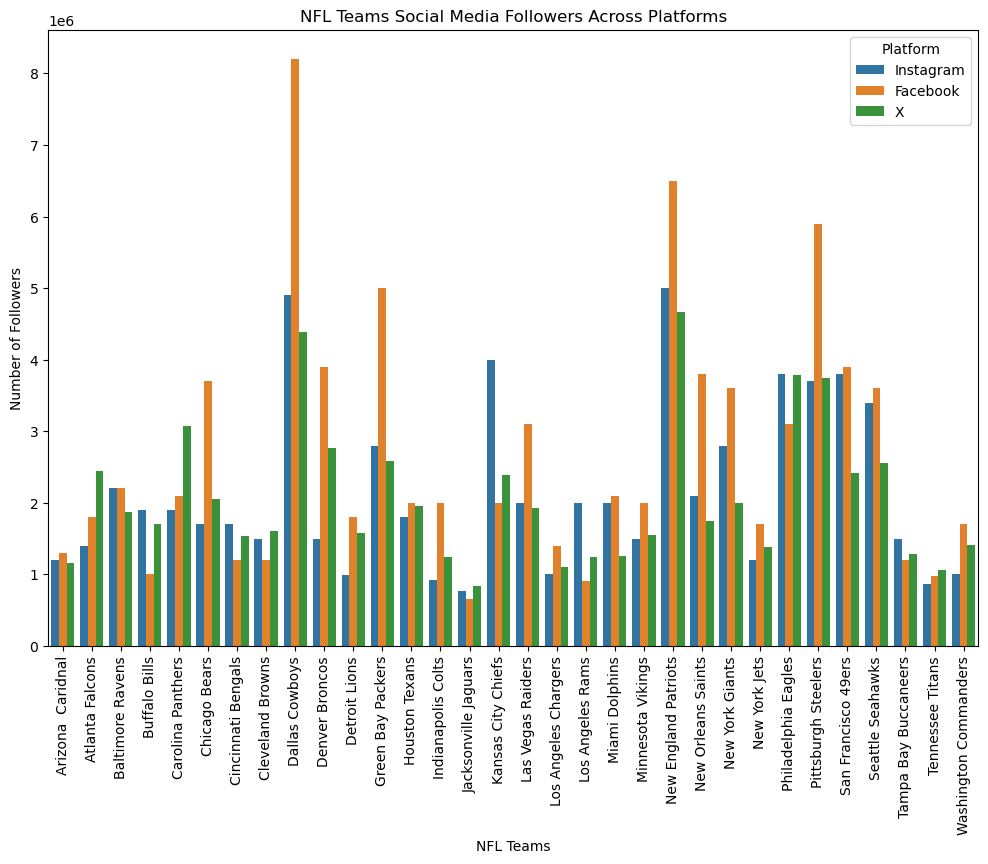

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming merged_data is your DataFrame
# Melt the DataFrame for easier plotting
df_melted = merged_data.melt(id_vars="Team Name", value_vars=["Instagram", "Facebook", "X"],
                    var_name="Platform", value_name="Followers")

# Create the bar plot
plt.figure(figsize=(12,8))
sns.barplot(x="Team Name", y="Followers", hue="Platform", data=df_melted)
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.title('NFL Teams Social Media Followers Across Platforms')
plt.xlabel('NFL Teams')
plt.ylabel('Number of Followers')

plt.savefig('../visualization/nfl_teams_social_media_followers.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

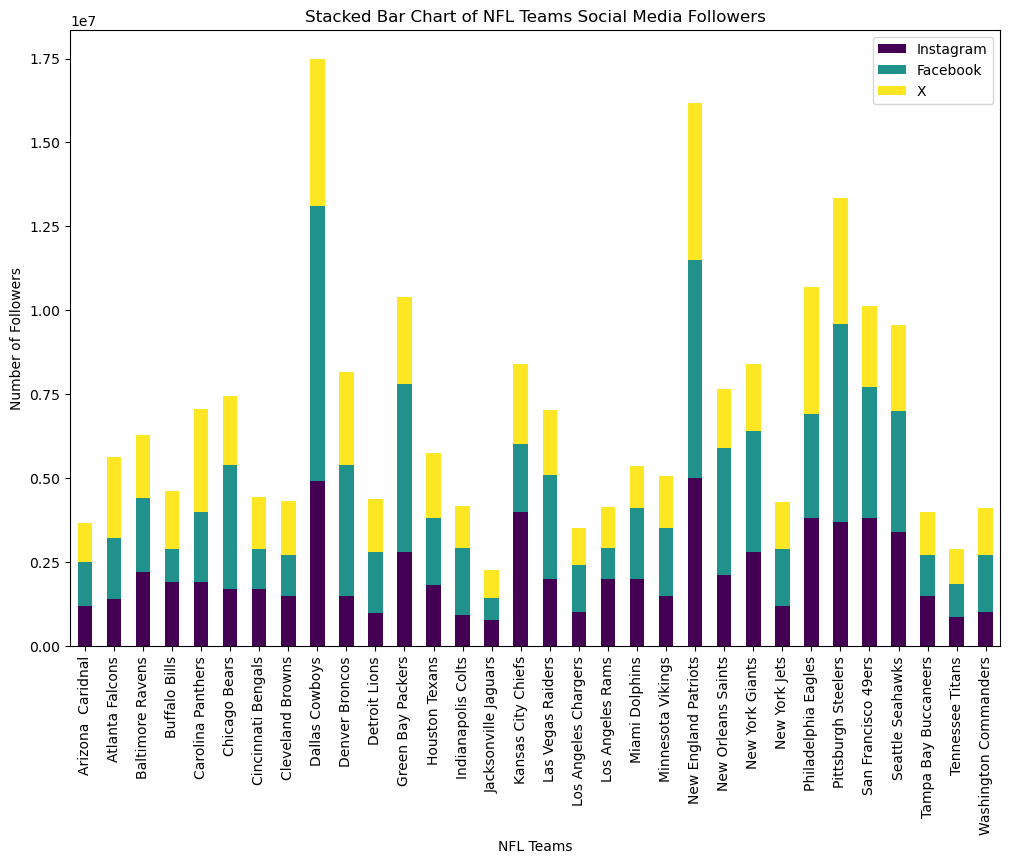

In [83]:
# Plot the stacked bar chart
merged_data.set_index('Team Name')[['Instagram', 'Facebook', 'X']].plot(
    kind='bar', stacked=True, figsize=(12,8), colormap='viridis')

plt.title('Stacked Bar Chart of NFL Teams Social Media Followers')
plt.xlabel('NFL Teams')
plt.ylabel('Number of Followers')

plt.xticks(rotation=90)

plt.savefig('../visualization/stacked_bar_chart_nfl_team_social_media_followers.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [39]:
print(merged_data['Team Name'].unique())


['Arizona  Caridnal' 'Atlanta Falcons' 'Baltimore Ravens' 'Buffalo Bills'
 'Carolina Panthers' 'Chicago Bears' 'Cincinnati Bengals'
 'Cleveland Browns' 'Dallas Cowboys' 'Denver Broncos' 'Detroit Lions'
 'Green Bay Packers' 'Houston Texans' 'Indianapolis Colts'
 'Jacksonville Jaguars' 'Kansas City Chiefs' 'Las Vegas Raiders'
 'Los Angeles Chargers' 'Los Angeles Rams' 'Miami Dolphins'
 'Minnesota Vikings' 'New England Patriots' 'New Orleans Saints'
 'New York Giants' 'New York Jets' 'Philadelphia Eagles'
 'Pittsburgh Steelers' 'San Francisco 49ers' 'Seattle Seahawks'
 'Tampa Bay Buccaneers' 'Tennessee Titans' 'Washington Commanders']


C:\Users\isfun\AppData\Local\Temp\ipykernel_15396\1371077048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Facebook', y='Team Name', data=merged_data.sort_values('Facebook', ascending=False), ax=axes[0], palette='Blues_r')
C:\Users\isfun\AppData\Local\Temp\ipykernel_15396\1371077048.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Instagram', y='Team Name', data=merged_data.sort_values('Instagram', ascending=False), ax=axes[1], palette='Greens_r')
C:\Users\isfun\AppData\Local\Temp\ipykernel_15396\1371077048.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` fo

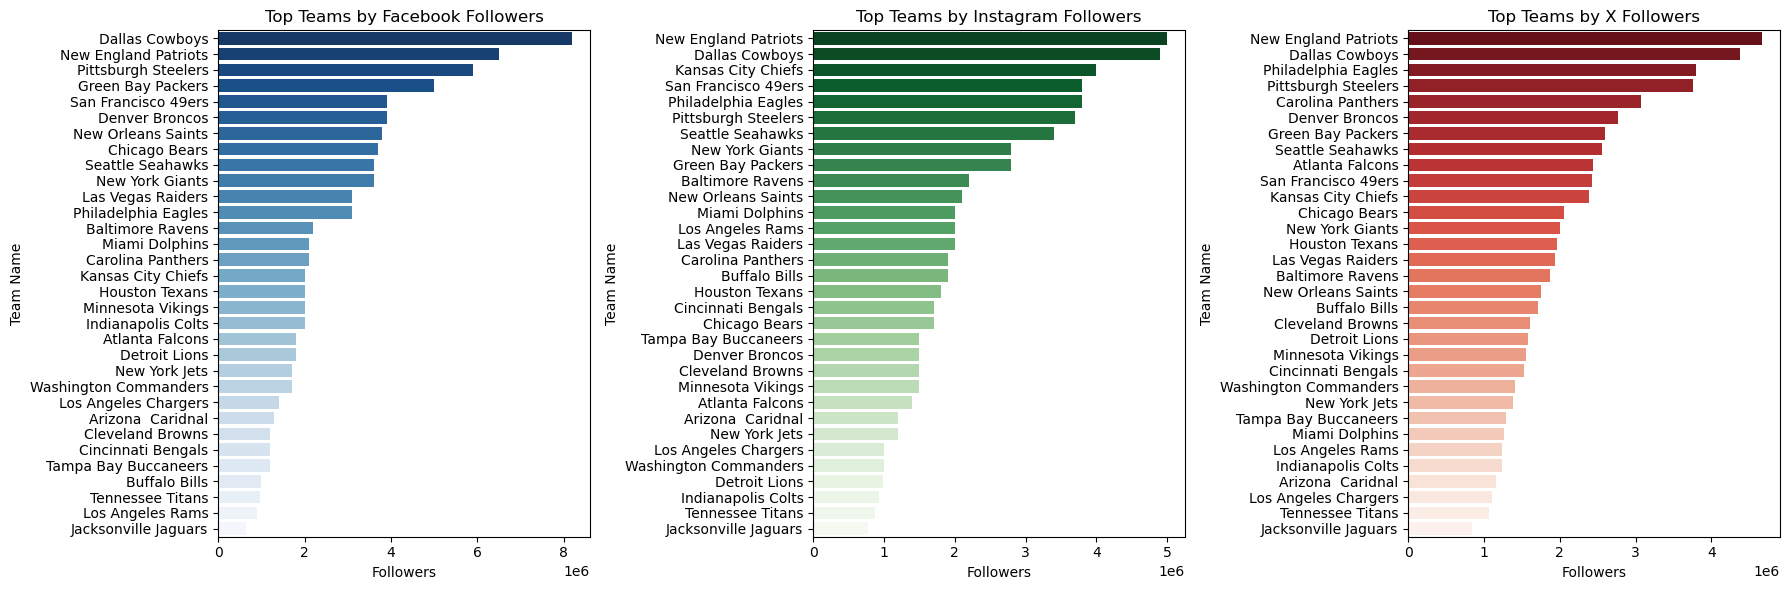

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Facebook followers
sns.barplot(x='Facebook', y='Team Name', data=merged_data.sort_values('Facebook', ascending=False), ax=axes[0], palette='Blues_r')
axes[0].set_title('Top Teams by Facebook Followers')
axes[0].set_xlabel('Followers')

# Plot Instagram followers
sns.barplot(x='Instagram', y='Team Name', data=merged_data.sort_values('Instagram', ascending=False), ax=axes[1], palette='Greens_r')
axes[1].set_title('Top Teams by Instagram Followers')
axes[1].set_xlabel('Followers')

# Plot X followers
sns.barplot(x='X', y='Team Name', data=merged_data.sort_values('X', ascending=False), ax=axes[2], palette='Reds_r')
axes[2].set_title('Top Teams by X Followers')
axes[2].set_xlabel('Followers')

# Adjust layout
plt.tight_layout()

plt.savefig('./visualization/top_teams_by_social_media.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
merged_data['team_id'] = range(1, len(merged_data) + 1)

cols = ['team_id'] + [col for col in merged_data.columns if col != 'team_id']
merged_data = merged_data[cols]

merged_data = merged_data.drop(columns=['Team Name'])


merged_data.head()

,team_id,Instagram,Facebook,X
0,1,1200000,1300000.0,1160000.0
1,2,1400000,1800000.0,2440000.0
2,3,2200000,2200000.0,1870000.0
3,4,1900000,1000000.0,1710000.0
4,5,1900000,2100000.0,3070000.0


In [19]:
#Output data to csv
output_file_name = 'nfl_social_media_cleaned_isfund.csv'
merged_data.to_csv(output_file_name, index=False)